In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn.objects as so
import ptitprince as pt
from venn import venn
from matplotlib.ticker import FuncFormatter

In [2]:
# chrome_old_train = pd.read_parquet(
#     "../data/processed/chrome/08_12_2022/train_set_01.parquet.gzip", engine="pyarrow",
#             dtype_backend="pyarrow"
# )
# chrome_old_test = pd.read_parquet(
#     "../data/processed/chrome/08_12_2022/test_set_01.parquet.gzip", engine="pyarrow",
#             dtype_backend="pyarrow"
# )

chrome_old = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/merged_data.parquet.gzip", engine="pyarrow",
            dtype_backend="pyarrow"
)

chrome_new = pd.read_parquet('../data/processed/chrome/03_29_2023/merged_data.parquet.gzip', engine="pyarrow", dtype_backend="pyarrow")

firefox = pd.read_parquet('../data/processed/firefox/08_12_2022/merged_data.parquet.gzip', engine="pyarrow",
            dtype_backend="pyarrow")

brave = pd.read_parquet('../data/processed/brave/08_12_2022/merged_data.parquet.gzip', engine="pyarrow",
            dtype_backend="pyarrow")

# chrome_old = pd.concat([chrome_old_train, chrome_old_test])

In [3]:
chrome_old[chrome_old.tracker == 0].shape

(602516, 8096)

In [3]:
len(chrome_old[chrome_old.tracker == 1])

256202

In [4]:
chrome_old.shape

(858718, 8096)

In [15]:
def extract_table_values(df):
    total_num = len(df)
    
    class_1 = len(df[df.tracker == 1])
    class_0 = total_num - class_1

    # class_distribution_ratio = class_1 / class_0
    
    col_len = df.shape[1]
    class_1_col = df[df.tracker == 1].dropna(axis=1, how='all').shape[1]
    class_0_col = df[df.tracker == 0].dropna(axis=1, how='all').shape[1]
    
    
    results = {
        'num_resp_nt': class_0,
        'num_resp_t': class_1,
        'num_resp_total': total_num,
        'percent_resp_nt': class_0 / total_num,
        'percent_resp_t': class_1 / total_num,
        'num_headers_nt': class_0_col,
        'num_headers_t': class_1_col,
    }
    
    return results

In [16]:
a = extract_table_values(chrome_old)

In [17]:
a

{'num_resp_nt': 602516,
 'num_resp_t': 256202,
 'num_resp_total': 858718,
 'percent_resp_nt': 0.7016459419739658,
 'percent_resp_t': 0.29835405802603415,
 'num_headers_nt': 7577,
 'num_headers_t': 2213}

In [18]:
extract_table_values(firefox)

{'num_resp_nt': 526865,
 'num_resp_t': 309391,
 'num_resp_total': 836256,
 'percent_resp_nt': 0.6300283645199556,
 'percent_resp_t': 0.3699716354800444,
 'num_headers_nt': 7322,
 'num_headers_t': 2516}

In [19]:
extract_table_values(brave)

{'num_resp_nt': 561694,
 'num_resp_t': 2969,
 'num_resp_total': 564663,
 'percent_resp_nt': 0.9947419965536967,
 'percent_resp_t': 0.00525800344630337,
 'num_headers_nt': 7348,
 'num_headers_t': 237}

In [20]:
extract_table_values(chrome_new)

{'num_resp_nt': 596066,
 'num_resp_t': 206747,
 'num_resp_total': 802813,
 'percent_resp_nt': 0.7424717835909483,
 'percent_resp_t': 0.25752821640905166,
 'num_headers_nt': 7398,
 'num_headers_t': 2164}

In [16]:
%%time
chrome_old_values_count = chrome_old.iloc[:, 6:-1].count().to_numpy()
chrome_new_values_count = chrome_new.iloc[:, 6:-1].count().to_numpy()
# chrome_old_values_count = pd.DataFrame(chrome_old_values_count.values.reshape(1, -1), columns=chrome_old_values_count.index.tolist())
# chrome_old_values_count = chrome_old_values_count.T.sort_values(by=0, ascending=False).T

CPU times: user 17 s, sys: 6.57 s, total: 23.6 s
Wall time: 28.7 s


In [17]:
firefox_values_count = firefox.iloc[:, 6:-1].count().to_numpy()
brave_values_count = brave.iloc[:, 6:-1].count().to_numpy()

In [ ]:
# plt.figure(figsize=(14, 7))
# sns.barplot(chrome_old_values_count.iloc[:, :], color='blue', lw=0.).set(xticklabels=[])
# plt.yscale('log')

In [21]:
firefox_values_count

array([37,  1,  7, ...,  7, 51,  1])

In [22]:
chrome_new_values_count[::-1].sort()
chrome_old_values_count[::-1].sort()

In [23]:
firefox_values_count[::-1].sort()
brave_values_count[::-1].sort()

In [24]:
a = pd.DataFrame([chrome_old_values_count, chrome_new_values_count, firefox_values_count, brave_values_count]).T

In [25]:
a

,0,1,2,3
0,854034.0,798773.0,831673.0,562922.0
1,828185.0,776942.0,801280.0,558378.0
2,719628.0,664986.0,701945.0,483258.0
3,714809.0,656446.0,688631.0,482942.0
4,660788.0,604963.0,635125.0,458499.0
...,...,...,...,...
8084,1.0,NaN,NaN,NaN
8085,1.0,NaN,NaN,NaN
8086,1.0,NaN,NaN,NaN
8087,1.0,NaN,NaN,NaN


In [12]:
a.replace(np.nan, 0, inplace=True)

In [26]:
a.rename(columns={0: 'chrome_old', 1: 'chrome_new', 2: 'firefox', 3: 'brave'}, inplace=True)

In [27]:
a

,chrome_old,chrome_new,firefox,brave
0,854034.0,798773.0,831673.0,562922.0
1,828185.0,776942.0,801280.0,558378.0
2,719628.0,664986.0,701945.0,483258.0
3,714809.0,656446.0,688631.0,482942.0
4,660788.0,604963.0,635125.0,458499.0
...,...,...,...,...
8084,1.0,NaN,NaN,NaN
8085,1.0,NaN,NaN,NaN
8086,1.0,NaN,NaN,NaN
8087,1.0,NaN,NaN,NaN


In [28]:
sns.set_theme(style="white", font_scale=1.2)
fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(1, 3)
g = sns.lineplot(a, ax=grid[0, :2])
plt.yscale('log')
g.set(
    # yticklabels=[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    xlim=(0, 8000),
    title="Number of HTTP/S responses per header"
)
f = sns.catplot(a, kind='boxen', ax=grid[0, 2:])
plt.yscale('log')

/Users/wolfrieder/Documents/github_repos/thesis_project_v2/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

<Figure size 1200x400 with 0 Axes>

In [9]:
len(chrome_old_values_count), len(chrome_new_values_count), len(firefox_values_count), len(brave_values_count)

(8089, 7896, 8037, 7365)

In [29]:
chrome_old_values_count

array([854034, 828185, 719628, ...,      1,      1,      1])

In [37]:
a.drop(['measurement'], axis=1, inplace=True)

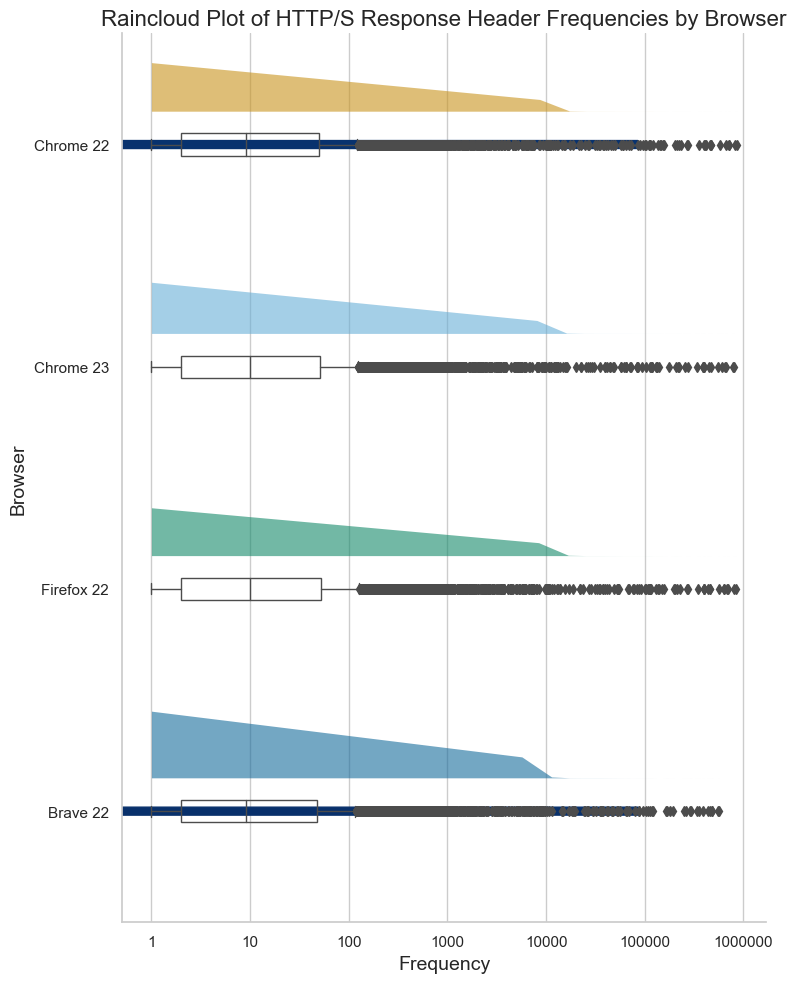

In [47]:
# Assuming 'a_long' is your long format dataframe
palette = ["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]

# Start plotting
sns.set(style="whitegrid")

# Melt the dataframe to long format
a_long = pd.melt(a, id_vars=['measurement'], var_name='Browser', value_name='Frequency')

# Create the figure and the axes (subplots)
fig, ax = plt.subplots(figsize=(8, 10))  # Adjust the size to fit your needs

# Create the raincloud plot (horizontal orientation)
pt.half_violinplot(y='Browser', x='Frequency', data=a_long, inner=None, bw=.2, 
                   cut=0, scale="area", width=.6, linewidth=0, alpha=.6, palette=palette, ax=ax, orient='h')

# Add the boxplot (horizontal orientation) with whiskers
sns.boxplot(y='Browser', x='Frequency', data=a_long, width=.1, linewidth=1, ax=ax,
            showcaps=True, boxprops={'facecolor':'none', "zorder":10},
            whiskerprops={'linewidth':1}, zorder=10, orient='h')

# Add a 2D histogram (hexbin plot)
# You will need to transform the categorical 'Browser' axis into a numeric scale for hexbin
browser_categories = a_long['Browser'].astype('category').cat.codes
plt.hexbin(a_long['Frequency'], browser_categories, gridsize=50, cmap='Blues', bins='log', mincnt=1)

# Adjust the x scale to logarithmic
ax.set_xscale('log')

# Format the x-axis to show full numbers (if necessary)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:0.0f}'.format(x)))

# Set the title and labels
ax.set_title("Raincloud Plot of HTTP/S Response Header Frequencies by Browser", fontsize=16)

# Set browser labels as per the first image
browser_labels = ['Chrome 22', 'Chrome 23', 'Firefox 22', 'Brave 22']
ax.set_yticklabels(browser_labels)

# Set X and Y labels
ax.set_xlabel("Frequency", fontsize=14)
ax.set_ylabel("Browser", fontsize=14)

# Optionally, remove the top spine for aesthetics similar to the uploaded image if horizontal
sns.despine(top=True)

plt.tight_layout()
plt.show()

/Users/wolfrieder/Documents/github_repos/thesis_project_v2/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

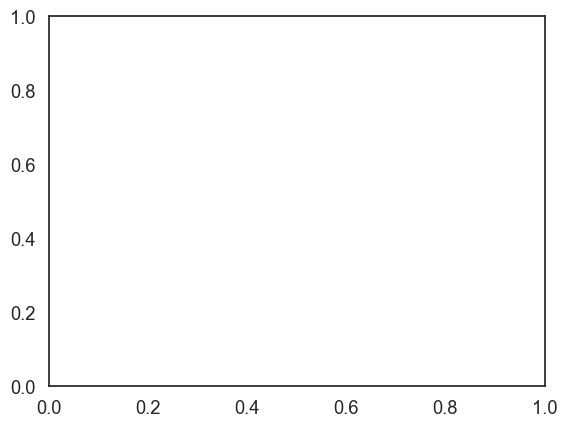

In [30]:
fig, ax = plt.subplots()
sns.boxenplot(a, ax=ax)
ax.set_yscale("log")

# Format y-axis ticks as full numbers
def format_full_number(x, pos):
    return '{:0.0f}'.format(x)

formatter = FuncFormatter(format_full_number)
ax.yaxis.set_major_formatter(formatter)

plt.show()

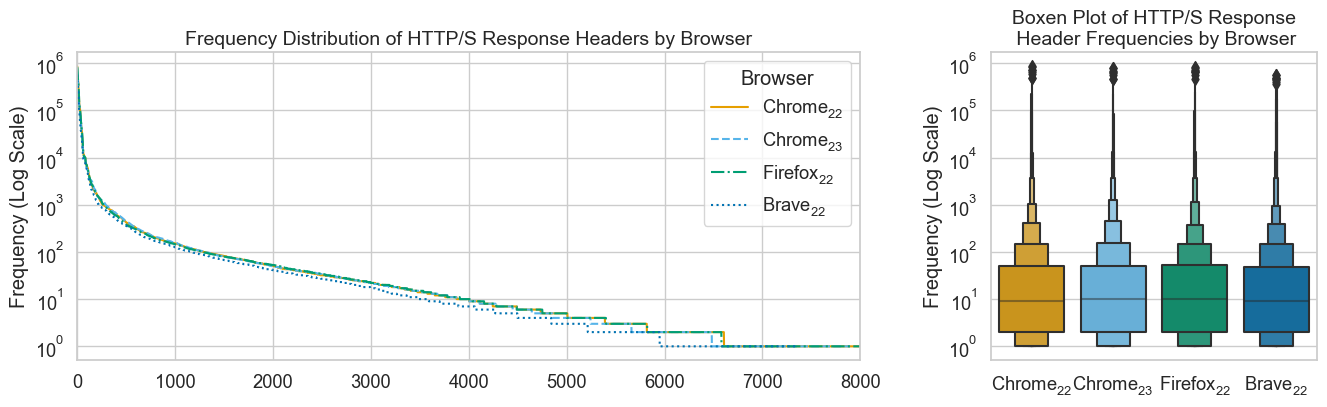

In [90]:
sns.set_theme(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(16, 4))
grid = plt.GridSpec(1, 3, wspace=0.4)  # Add wspace for space between plots
plt.rcParams.update({'mathtext.default': 'regular'})
# Line plot
ax1 = fig.add_subplot(grid[0, :2])
linestyles = ['-', '--', '-.', ':', '-', '--', '-.']
colors = ["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']

# Assuming 'a' is structured with columns for each browser:
for idx, browser in enumerate(a.columns):
    sns.lineplot(data=a, x=a.index, y=browser, ax=ax1, linestyle=linestyles[idx], color=colors[idx], label=labels[idx]) # Assuming 'a' is the dataset for the line plot
ax1.set_yscale('log')
ax1.set_ylabel('Frequency (Log Scale)')
ax1.set_xlim(0, 8000)
ax1.set_title("Frequency Distribution of HTTP/S Response Headers by Browser", fontsize=14)
ax1.legend(loc="upper right", title="Browser")

# Catplot (boxen plot)
ax2 = fig.add_subplot(grid[0, 2])
sns.boxenplot(data=a, ax=ax2, palette=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"])  # Assuming 'a' is the dataset for the boxen plot
ax2.set_yscale('log')
ax2.set_title("Boxen Plot of HTTP/S Response\n Header Frequencies by Browser", fontsize=14) 
ax2.set_ylabel('Frequency (Log Scale)')
xticklabels = labels
# ax2.set_yticklabels([]) 
ax2.set_xticklabels(xticklabels)

# Bar plot with error bars
# ax3 = fig.add_subplot(grid[0, 3])
# sns.barplot(data=a, ax=ax3, capsize=0.1, palette=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"])
# ax3.set_yscale('log')
# ax3.set_yticks(ax1.get_yticks())  # Use the same y-ticks as ax1
# ax3.set_yticklabels(ax1.get_yticklabels()) 
# ax3.set_ylabel('Average Frequency (Log Scale)')
# ax3.set_title("Average Frequency of HTTP/S Response\n Headers by Browser with Error Bars", fontsize=14)

plt.savefig('headers_frequency.pdf', bbox_inches='tight')
plt.show()

Figure 1 illustrates the usage of HTTP/S response headers across four different browsers. The left plot (a) displays the frequency distribution of HTTP/S response headers for each browser, showing how often each header is present in the dataset. The right plot (b) presents a boxen plot of the same data, which provides a more detailed view of the distribution, revealing variations and trends among the browsers. The browsers are represented by their abbreviations: CO (Browser 1), CN (Browser 2), F (Browser 3), and B (Browser 4). Both plots are shown on a logarithmic scale to better visualize the wide range of header frequency values.

KeyError: 'y'

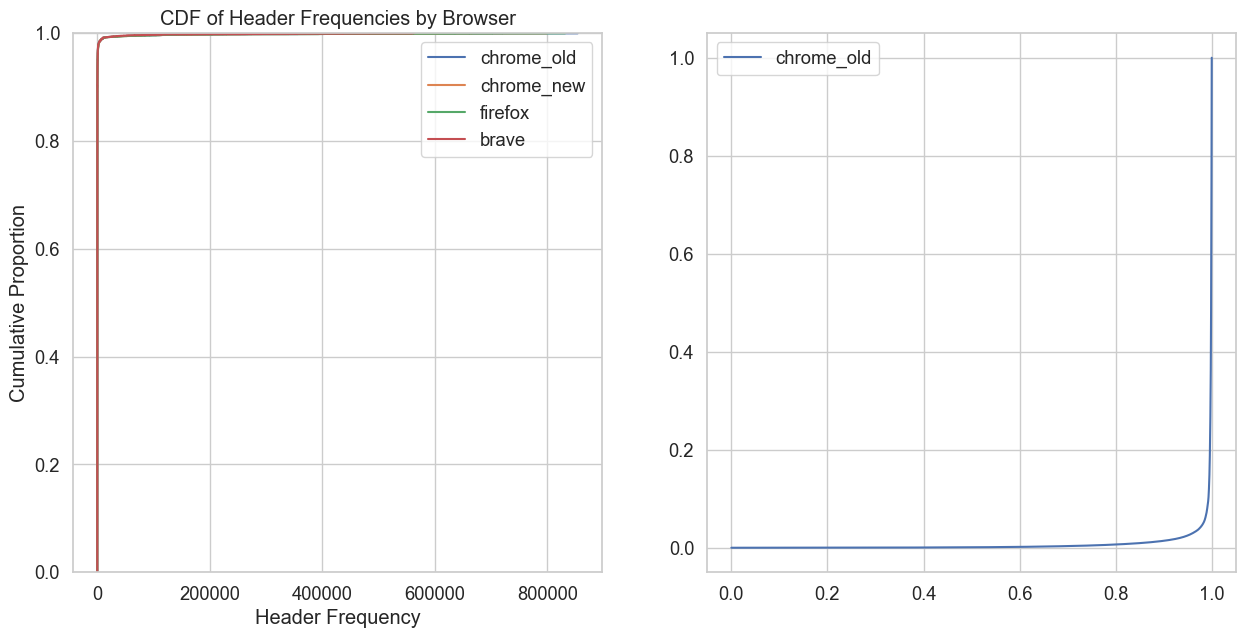

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plotting the ECDF using Seaborn's ecdfplot
for browser in a.columns:
    sns.ecdfplot(a[browser], label=browser, ax=axs[0])

axs[0].set_title("CDF of Header Frequencies by Browser")
axs[0].set_xlabel("Header Frequency")
axs[0].set_ylabel("Cumulative Proportion")
axs[0].legend()

# Plotting the Lorenz Curve using Seaborn
for browser in a.columns:
    sorted_freqs = a[browser].sort_values(ascending=True).values
    cumsum_freqs = np.cumsum(sorted_freqs)
    lorenz_curve = cumsum_freqs / cumsum_freqs[-1]
    sns.lineplot(x=np.linspace(0, 1, len(lorenz_curve)), y=lorenz_curve, label=browser, ax=axs[1])

# Adding the line of equality
axs[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[1].set_title("Lorenz Curve of Header Frequencies by Browser")
axs[1].set_xlabel("Cumulative Proportion of Headers")
axs[1].set_ylabel("Cumulative Proportion of Occurrences")
axs[1].legend()

plt.tight_layout()
plt.show()

In [77]:
import matplotlib.patches as mpatches

<Figure size 400x400 with 0 Axes>

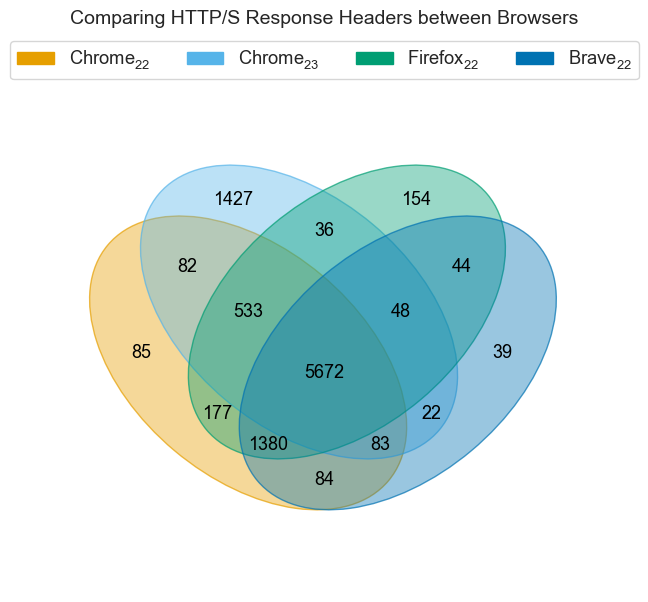

In [92]:
# Assuming the lists are named list1, list2, list3, and list4
set1 = set(chrome_old.columns.to_list())
set2 = set(chrome_new.columns.to_list())
set3 = set(firefox.columns.to_list())
set4 = set(brave.columns.to_list())
# Combine all sets into a dictionary
data_dict = {
    '$Chrome_{22}$': set1,
    '$Chrome_{23}$': set2,
    '$Firefox_{22}$': set3,
    '$Brave_{22}$': set4
}

plt.figure(figsize=(4, 4))
venn(data_dict, cmap=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"])
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=patches, loc='upper center', ncol=4)
plt.title("Comparing HTTP/S Response Headers between Browsers", fontsize=14)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.savefig('venn.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Figure 1 presents a four-set Venn diagram comparing the HTTP/S response headers between four browsers: CO, CN, F, and B. Each circle in the diagram represents one browser, and the overlapping areas between the circles illustrate the common response headers shared by the corresponding browsers. The numbers within each section of the circles indicate the count of unique response headers for that particular combination of browsers. This visualization enables a comprehensive understanding of the similarities and differences in the HTTP/S response headers used by each browser and highlights the extent to which their header usage overlaps.

In [1]:
def sparsity_ratio(df):
    np_array = df.to_numpy()
    num_zeros = np.count_nonzero(np_array == 0) + np.isnan(np_array).sum()
    total_elements = np_array.size
    sparsity = num_zeros / total_elements
    return sparsity

def density(df):
    return 1 - sparsity_ratio(df)

def gini_index(df):
    np_array = df.to_numpy().flatten()
    np_array = np_array[~np.isnan(np_array)]
    n = len(np_array)
    gini = (np.sum((2 * np.arange(n) - n + 1) * np.sort(np_array))) / (n * np.sum(np_array))
    return gini

def shannon_entropy(df):
    np_array = df.to_numpy()
    unique_elements, counts = np.unique(np_array, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [ ]:
# Usage
sparsity = sparsity_ratio(chrome_old)
print("Sparsity Ratio:", sparsity)
print("Density:", density(chrome_old))

In [5]:
a = chrome_old.to_numpy()

In [8]:
np.count_nonzero(a[:100,:100] == 0)

/var/folders/wk/770974_933q_mcw9wsl_nvkw0000gn/T/ipykernel_47247/4176296220.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  np.count_nonzero(a[:100,:100] == 0)
/var/folders/wk/770974_933q_mcw9wsl_nvkw0000gn/T/ipykernel_47247/4176296220.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.count_nonzero(a[:100,:100] == 0)


0

In [18]:
import pyarrow as pa

In [17]:
chrome_old.dtypes

hostname              string[pyarrow]
pathname              string[pyarrow]
filetype              string[pyarrow]
filename              string[pyarrow]
protocol              string[pyarrow]
                           ...       
x-ta                  string[pyarrow]
x-cache-cms-status    string[pyarrow]
x-pbs-appsvrname      string[pyarrow]
x-pbs-appsvrip        string[pyarrow]
tracker                int32[pyarrow]
Length: 5316, dtype: object

In [5]:
# chrome_old_calib = pd.read_parquet(
#     "../data/processed/chrome/08_12_2022/calibration_set_processed.parquet.gzip", engine="pyarrow",
#             dtype_backend="pyarrow"
# )
# 
# chrome_old_train = pd.read_parquet(
#     "../data/processed/chrome/08_12_2022/train_set_processed.parquet.gzip", engine="pyarrow",
#             dtype_backend="pyarrow"
# )
# 
# chrome_old_test = pd.read_parquet(
#     "../data/processed/chrome/08_12_2022/test_set_processed.parquet.gzip", engine="pyarrow",
#             dtype_backend="pyarrow"
# )
# 
# chrome_old_valid = pd.read_parquet(
#     "../data/processed/chrome/08_12_2022/validation_set_processed.parquet.gzip", engine="pyarrow",
#             dtype_backend="pyarrow"
# )

In [66]:
chrome_old = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/merged_data.parquet.gzip", engine="pyarrow",
            dtype_backend="pyarrow"
)

In [33]:
chrome_old.shape

(858718, 8096)

In [34]:
chrome_old.columns

Index(['hostname', 'pathname', 'filetype', 'filename_one', 'protocol', 'query',
       'x-bapp-server', 'azure-sitename', 'x-powered-by', 'x-yandexuid',
       ...
       'access-control-max-age', 'x-edge-cache-tag-at-origin', 'scope',
       'x-amz-meta-x-deployment-hash', 'x-oneagent-js-injection',
       'context-type', 'x-ocm-geo', 'tbws3', 'box', 'tracker'],
      dtype='object', length=8096)

In [9]:
# chrome_old = pd.concat([chrome_old_calib, chrome_old_train, chrome_old_test, chrome_old_valid], axis=0)

In [14]:
chrome_old.shape

(858718, 163)

In [18]:
col_non_tracker = chrome_old['comb_col_non_tracker']
col_tracker = chrome_old['comb_col_tracker']

In [27]:
len(col_non_tracker[col_non_tracker > 0])

306135

In [24]:
np.min(col_non_tracker.loc[lambda x: x > 0])

1

In [37]:
del chrome_old

In [44]:
def compute_headers_count_parquet(filename, chunk_size=10000):
    total_rows = pd.read_parquet(filename, columns=['tracker'], engine="pyarrow",
            dtype_backend="pyarrow").shape[0]
    
    counts = []
    for start in range(0, total_rows, chunk_size):
        chunk = pd.read_parquet(filename, skiprows=range(1, start + 1), nrows=chunk_size, engine="pyarrow",
            dtype_backend="pyarrow")

        # Assuming the label column is named 'label'
        labels = chunk['tracker']
        # Drop the label column for counting
        chunk.drop(['hostname', 'pathname', 'filetype', 'filename_one', 'protocol', 'query','tracker'], axis=1, inplace=True)
        # Count non-NaN headers
        non_na_count = chunk.notna().sum(axis=1)
        counts.append(pd.DataFrame({'tracker': labels, 'header_count': non_na_count}))
    return pd.concat(counts, ignore_index=True)

In [ ]:
%%time
df_counts = compute_headers_count_parquet("../data/processed/chrome/08_12_2022/calibration_set.parquet.gzip")

In [47]:
chrome_old.drop(['hostname', 'pathname', 'filetype', 'filename_one', 'protocol', 'query','tracker'], axis=1, inplace=True)

In [68]:
chrome_old.shape

(858718, 8096)

In [67]:
chrome_old.loc[chrome_old.tracker == 0].iloc[0:200000, 6:-1].shape

(200000, 8089)

In [61]:
%%time
chrome_old.iloc[0:200000, 6:-1].notna().sum(axis=1)

CPU times: user 2.87 s, sys: 781 ms, total: 3.65 s
Wall time: 4.22 s


0         14
1         14
2         14
3         14
4         14
          ..
199995    17
199996    18
199997    16
199998    15
199999    18
Length: 200000, dtype: int64

In [29]:
%%time
chrome_old.iloc[:, 6:-1].count(axis=1)

CPU times: user 11.4 s, sys: 4.5 s, total: 15.9 s
Wall time: 19.3 s


0         14
1         14
2         14
3         14
4         14
          ..
858713    15
858714    15
858715    15
858716    15
858717    15
Length: 858718, dtype: int64

In [30]:
chrome_old.iloc[:1, 6:-1].shape

(1, 8089)

In [28]:
chrome_old.iloc[:1, 6:-1].isna().sum(axis=1)

0    8075
dtype: int64

In [31]:
def calc_headers_count(df):
    header_counts = df.iloc[:, 6:-1].count(axis=1)
    median = header_counts.median()
    percentile_25 = header_counts.quantile(0.25)
    percentile_75 = header_counts.quantile(0.75)
    iqr = percentile_75 - percentile_25

    # Calculating mean, median, and std for the number of unique headers
    mean_headers = header_counts.mean()
    median_headers = median  # same as median calculated above
    std_headers = header_counts.std()

    return {
        'median': median, 
        '25th_percentile': percentile_25, 
        '75th_percentile': percentile_75, 
        'iqr': iqr,
        'mean_unique_headers': mean_headers, 
        'median_unique_headers': median_headers, 
        'std_unique_headers': std_headers
    }

In [33]:
chrome_old_tracker = calc_headers_count(chrome_old[chrome_old.tracker == 1])
chrome_old_non_tracker = calc_headers_count(chrome_old[chrome_old.tracker == 0])

In [34]:
chrome_old_tracker

{'median': 13.0,
 '25th_percentile': 10.0,
 '75th_percentile': 16.0,
 'iqr': 6.0,
 'mean_unique_headers': 12.781539566435859,
 'median_unique_headers': 13.0,
 'std_unique_headers': 4.217537537498968}

In [36]:
chrome_old_non_tracker

{'median': 15.0,
 '25th_percentile': 12.0,
 '75th_percentile': 19.0,
 'iqr': 7.0,
 'mean_unique_headers': 15.723082872488034,
 'median_unique_headers': 15.0,
 'std_unique_headers': 4.878896064786987}

In [35]:
chrome_new_tracker = calc_headers_count(chrome_new[chrome_new.tracker == 1])
chrome_new_non_tracker = calc_headers_count(chrome_new[chrome_new.tracker == 0])

In [37]:
chrome_new_tracker

{'median': 13.0,
 '25th_percentile': 10.0,
 '75th_percentile': 16.0,
 'iqr': 6.0,
 'mean_unique_headers': 12.925783687308643,
 'median_unique_headers': 13.0,
 'std_unique_headers': 4.38794889257168}

In [38]:
chrome_new_non_tracker

{'median': 15.0,
 '25th_percentile': 13.0,
 '75th_percentile': 19.0,
 'iqr': 6.0,
 'mean_unique_headers': 15.713786728315322,
 'median_unique_headers': 15.0,
 'std_unique_headers': 4.8069659837524465}

In [40]:
firefox_tracker = calc_headers_count(firefox[firefox.tracker == 1])
firefox_non_tracker = calc_headers_count(firefox[firefox.tracker == 0])

In [41]:
firefox_tracker

{'median': 15.0,
 '25th_percentile': 12.0,
 '75th_percentile': 18.0,
 'iqr': 6.0,
 'mean_unique_headers': 14.788468313557924,
 'median_unique_headers': 15.0,
 'std_unique_headers': 4.505873178792521}

In [42]:
firefox_non_tracker

{'median': 16.0,
 '25th_percentile': 13.0,
 '75th_percentile': 19.0,
 'iqr': 6.0,
 'mean_unique_headers': 16.23389483074412,
 'median_unique_headers': 16.0,
 'std_unique_headers': 5.197693636227682}

In [44]:
brave_tracker = calc_headers_count(brave[brave.tracker == 1])
brave_non_tracker = calc_headers_count(brave[brave.tracker == 0])

In [45]:
brave_tracker

{'median': 18.0,
 '25th_percentile': 13.0,
 '75th_percentile': 20.0,
 'iqr': 7.0,
 'mean_unique_headers': 15.213203098686426,
 'median_unique_headers': 18.0,
 'std_unique_headers': 5.892170167707269}

In [46]:
brave_non_tracker

{'median': 15.0,
 '25th_percentile': 12.0,
 '75th_percentile': 19.0,
 'iqr': 7.0,
 'mean_unique_headers': 15.74362553276339,
 'median_unique_headers': 15.0,
 'std_unique_headers': 4.796102890526353}

In [47]:
chrome_new

,hostname,pathname,filetype,filename_one,protocol,query,x-flog,x-urbn-scopes,x-content-powered-by,x-cos-request-id,...,x-broadcast-id,x-akamai-cache-tag-error,x-is-modern-browser,zfw-error-code,rnt-jn-ext-uuid,x-edw-page-name,x-ua-device-simple,x-has-esi,show-do-not-sell-link,tracker
0,imgs.cdn-btsg.com,/fp/clear.png,png,clear.png,https,org_id=w2txo5aa&session_id=sx_a23495b252ee4a01...,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
1,www.aa.com,/akam/13/pixel_ed6754b,pixel_ed6754b,pixel_ed6754b,https,,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
2,googleads.g.doubleclick.net,/pagead/id,id,id,https,,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
3,static.doubleclick.net,/instream/ad_status.js,js,ad_status.js,https,,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
4,jnn-pa.googleapis.com,/$rpc/google.internal.waa.v1.Waa/Create,Create,Create,https,,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802808,mc.yandex.com,/webvisor/56010025,56010025,56010025,https,wmode=0&wv-part=6&wv-hit=144964618&page-url=ht...,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
802809,www.eveonline.com,/api/arcgoals/current-goals,current-goals,current-goals,https,,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
802810,mc.yandex.com,/webvisor/56010025,56010025,56010025,https,wmode=0&wv-part=7&wv-hit=144964618&page-url=ht...,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
802811,mc.yandex.com,/webvisor/56010025,56010025,56010025,https,wmode=0&wv-part=8&wv-hit=144964618&page-url=ht...,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1


In [48]:
def find_top_k_headers(df, k):
    # Count the non-NA values for each header
    header_counts = df.count()

    # Sort the headers by their counts in descending order
    sorted_headers = header_counts.sort_values(ascending=False)

    # Return the top k headers
    return sorted_headers.head(k)

In [64]:
test_set = chrome_new.iloc[:100000, 6:]

In [68]:
%%time
find_top_k_headers(chrome_new.iloc[:, 6:-1], 20)

CPU times: user 8.06 s, sys: 3.28 s, total: 11.3 s
Wall time: 13.3 s


date                           798773
content-type                   776942
cache-control                  664986
server                         656446
content-length                 604963
last-modified                  555350
etag                           466739
vary                           452417
expires                        396692
access-control-allow-origin    395971
accept-ranges                  392346
content-encoding               385707
age                            340327
strict-transport-security      276544
x-content-type-options         253602
x-cache                        222447
alt-svc                        215742
via                            206439
x-xss-protection               176975
cf-ray                         139299
dtype: int64

In [70]:
%%time
find_top_k_headers(chrome_old.iloc[:, 6:-1], 20)

CPU times: user 8.68 s, sys: 3.84 s, total: 12.5 s
Wall time: 15.1 s


date                            854034
content-type                    828185
server                          719628
cache-control                   714809
content-length                  660788
last-modified                   574373
vary                            473263
etag                            472688
expires                         455714
accept-ranges                   413704
content-encoding                403951
access-control-allow-origin     400512
age                             356627
x-content-type-options          275133
strict-transport-security       266162
alt-svc                         234328
x-cache                         222764
via                             209986
x-xss-protection                204141
cross-origin-resource-policy    156285
dtype: int64

In [71]:
%%time
find_top_k_headers(firefox.iloc[:, 6:-1], 20)

CPU times: user 8.77 s, sys: 3.93 s, total: 12.7 s
Wall time: 15.9 s


date                           831673
content-type                   801280
server                         701945
cache-control                  688631
x-firefox-spdy                 635125
content-length                 632750
last-modified                  561388
etag                           459157
vary                           457586
expires                        441063
content-encoding               403026
accept-ranges                  398295
access-control-allow-origin    394032
age                            348264
x-content-type-options         273486
strict-transport-security      267974
alt-svc                        229156
x-cache                        212996
x-xss-protection               201913
via                            198671
dtype: int64

In [72]:
%%time
find_top_k_headers(brave.iloc[:, 6:-1], 20)

CPU times: user 5.24 s, sys: 1.86 s, total: 7.1 s
Wall time: 8.04 s


date                           562922
content-type                   558378
server                         483258
cache-control                  482942
last-modified                  458499
content-length                 435750
etag                           391276
accept-ranges                  352194
vary                           334742
expires                        292661
age                            290518
content-encoding               263236
access-control-allow-origin    248012
strict-transport-security      191568
x-cache                        179780
x-content-type-options         167447
via                            163575
expect-ct                      120424
cf-ray                         117409
cf-cache-status                113656
dtype: int64